<a href="https://colab.research.google.com/github/Santhoshreddy-aiml/2311CS020570-Excelr-/blob/main/Electric_motor_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
file_path="/content/drive/MyDrive/temperature_data.csv"

In [44]:
df = pd.read_csv(file_path)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [46]:
print(df.isnull().sum())

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64


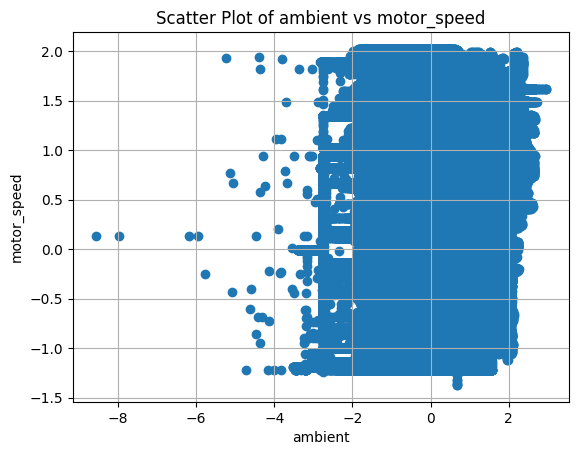

In [47]:
plt.scatter(df['ambient'], df['motor_speed'])
plt.xlabel('ambient')
plt.ylabel('motor_speed')
plt.title('Scatter Plot of ambient vs motor_speed')
plt.grid()
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['ambient', 'motor_speed']] = scaler.fit_transform(df[['ambient', 'motor_speed']])
print(df.head())

    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0  0.677737 -1.118446  0.327935 -1.297858     0.043909 -0.250182  1.029572   
1  0.676080 -1.117021  0.329665 -1.297686     0.043909 -0.249133  1.029509   
2  0.675073 -1.116681  0.332771 -1.301822     0.043909 -0.249431  1.029448   
3  0.675242 -1.116764  0.333700 -1.301852     0.043908 -0.248636  1.032845   
4  0.675840 -1.116775  0.335206 -1.303118     0.043909 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4  


<Figure size 1000x600 with 0 Axes>

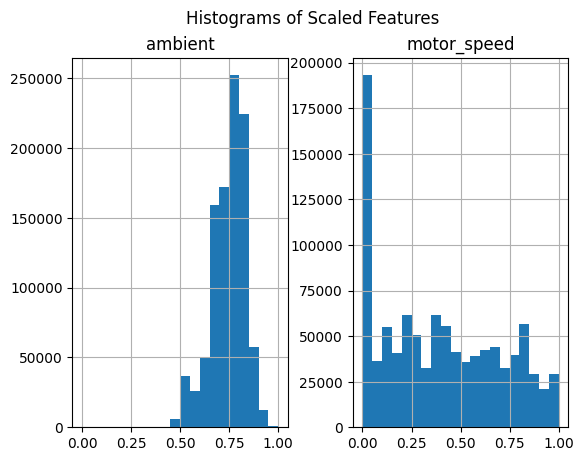

In [49]:
plt.figure(figsize=(10,6))
df[['ambient', 'motor_speed']].hist(bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()

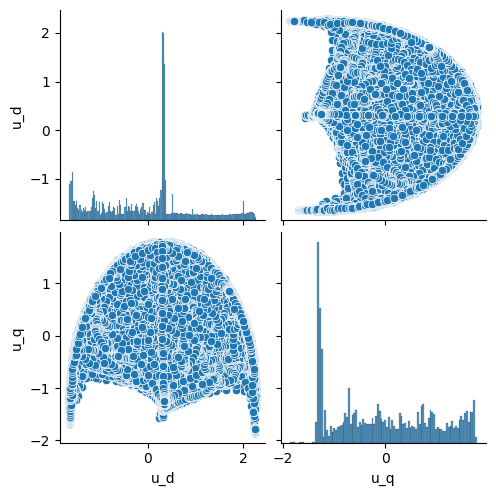

In [50]:
sns.pairplot(df[['u_d','u_q']])
plt.show()

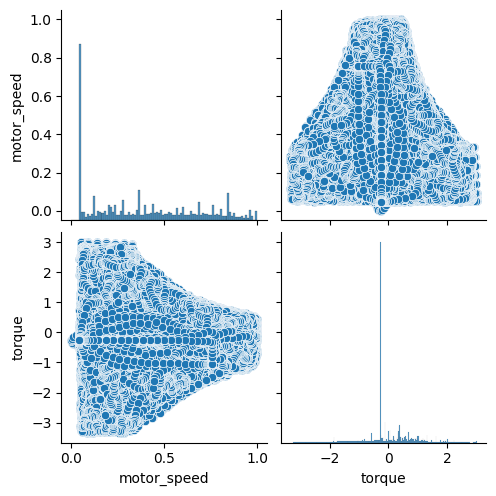

In [51]:
sns.pairplot(df[['motor_speed',	'torque']])
plt.show()

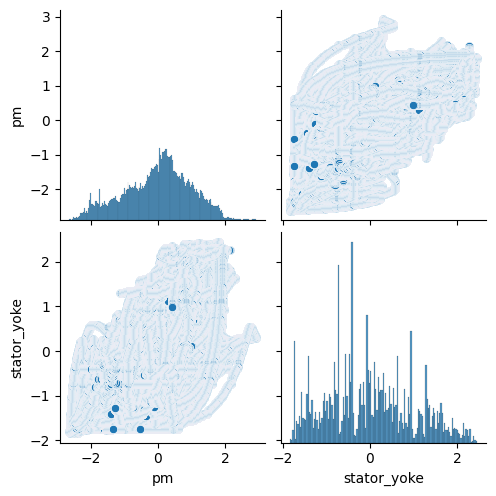

In [52]:
sns.pairplot(df[['pm',	'stator_yoke']])
plt.show()

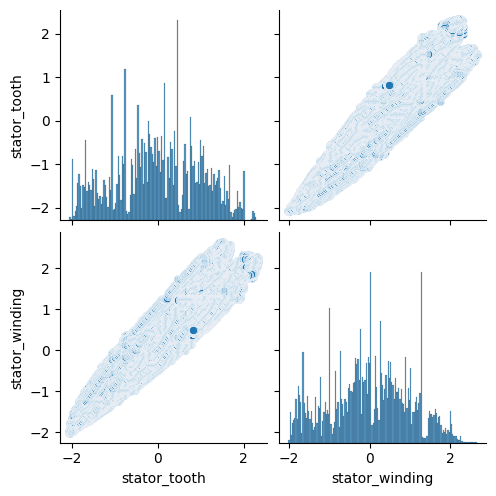

In [53]:
sns.pairplot(df[['stator_tooth',	'stator_winding']])
plt.show()

In [55]:
print("\nDataset Summary:")
print(df.describe())



Dataset Summary:
             ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean        0.742570       0.004723       0.004780      -0.005690   
std         0.086052       1.002423       0.997878       1.002330   
min         0.000000      -1.429349      -1.655373      -1.861463   
25%         0.690973      -1.037925      -0.826359      -0.927390   
50%         0.765970      -0.177187       0.267542      -0.099818   
75%         0.802406       0.650709       0.358491       0.852625   
max         1.000000       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean        0.402037      -0.003333       0.006043      -0.003194   
std         0.294853       0.997907       0.998994       0.997912   
min         0.000000      -3.345953      -3.245874      -3.341639   
25%         0.1